# Holiday weather

by Yitbarek Yesfaye

`'Due to the insufficient data available in my home country, Ethiopia, I opted to conduct my analysis using data from London.'`

I really enjoy taking holidays. In winter, I like to take time off and spend it indoors with family and friends. In summer, I prefer relaxing outdoors, whether in the garden or exploring nearby places. The challenge is that I often end up choosing days when the weather is dull or rainy, which makes planning frustrating.

For this project, I’ll use historic weather data from Weather Underground for London to identify two weeks of favorable summer weather for a holiday break. While future conditions may differ from past years, the analysis should still provide useful guidance on when to expect better weather for time off.

## Getting the data

Weather Underground keeps historical weather data collected in many airports around the world.

http://www.wunderground.com/history

Weather Underground has changed in the past the way it provides data and may do so again in the future. 
I have therefore collated the whole 2014 data in the provided 'London_2014.csv' file. 

I load the CSV file into a dataframe

In [2]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from pandas import *
from datetime import datetime

london = read_csv('London_2014.csv', skipinitialspace=True)

## Cleaning the data
First i need to clean up the data. I'm not going to make use of `'WindDirDegrees'` in my analysis i'll rename `'WindDirDegrees< br />'` to `'WindDirDegrees'`. 

In [3]:
london = london.rename(columns={'WindDirDegrees<br />' : 'WindDirDegrees'})

remove the  `< br />`  html line breaks from the values in the `'WindDirDegrees'` column. 

In [4]:
london['WindDirDegrees'] = london['WindDirDegrees'].str.rstrip('<br />')

and change the values in the `'WindDirDegrees'` column to `float64`:

In [5]:
london['WindDirDegrees'] = london['WindDirDegrees'].astype('float64')   

We definitely need to change the values in the `'GMT'` column into values of the `datetime64`  date type.

In [6]:
london['GMT'] = to_datetime(london['GMT'])

We also need to change the index from the default to the `datetime64` values in the `'GMT'` column so that it is easier to pull out rows between particular dates and display more meaningful graphs: 

In [7]:
london.index = london['GMT']

## Finding a summer break

According to meteorologists, summer extends for the whole months of June, July, and August in the northern hemisphere and the whole months of December, January, and February in the southern hemisphere. So as I'm in the northern hemisphere I'm going to create a dataframe that holds just those months using the `datetime` index, like this:

In [8]:
summer = london.loc[datetime(2014,6,1) : datetime(2014,8,31)]

I now look for the days with warm temperatures.

In [9]:
summer[summer['Mean TemperatureC'] >= 25]

,GMT,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
GMT,,,,,,,,,,,,,,,,,,,,,


Summer 2014 was rather cool in London: there are no days with temperatures of 25 Celsius or higher. Best to see a graph of the temperature and look for the warmest period.

So next we tell Jupyter to display any graph created inside this notebook:

In [10]:
%matplotlib inline

Now let's plot the `'Mean TemperatureC'` for the summer:

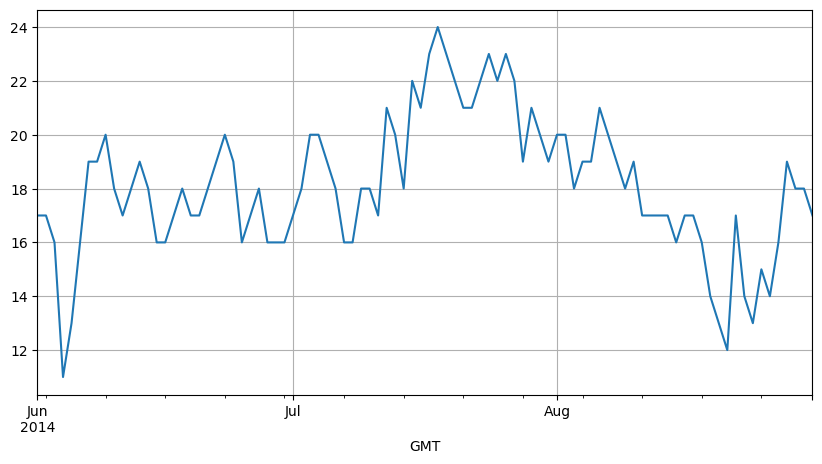

In [ ]:
summer['Mean TemperatureC'].plot(grid=True, figsize=(10,5))
import matplotlib.pyplot as plt
plt.savefig("mean_temperature.jpg")


Well looking at the graph the second half of July looks good for mean temperatures over 20 degrees C so let's also put precipitation on the graph too:

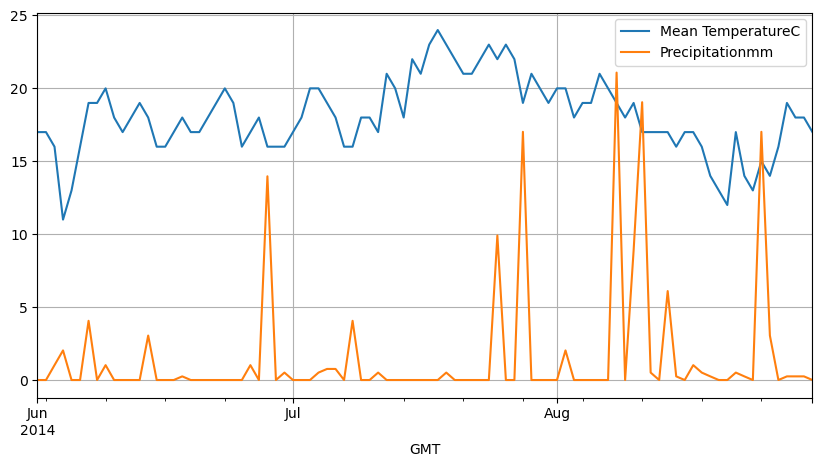

In [ ]:
summer[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))
import matplotlib.pyplot as plt
plt.savefig("temp_perception.jpg")


The second half of July is still looking good, with just a couple of peaks showing heavy rain. Let's have a closer look by just plotting mean temperature and precipitation for July.  

<Axes: xlabel='GMT'>

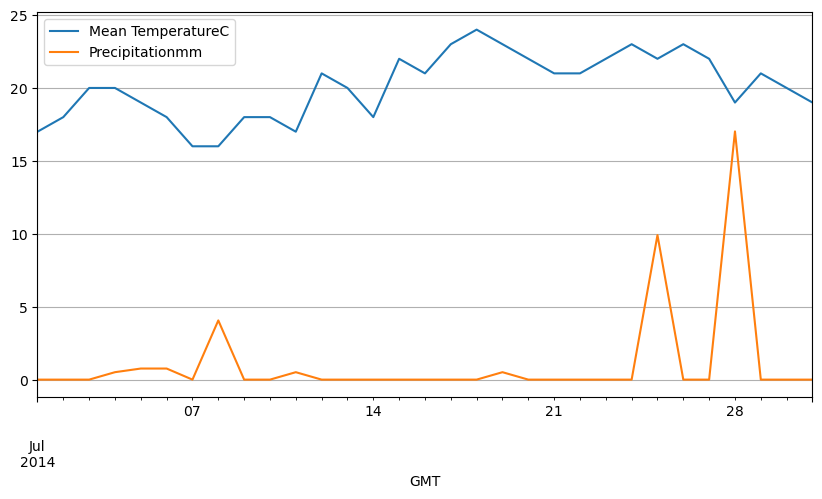

In [13]:
july = summer.loc[datetime(2014,7,1) : datetime(2014,7,31)]
july[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))

Yes, second half of July looks pretty good, just two days that have significant rain, the 25th and the 28th and just one day when the mean temperature drops below 20 degrees, also the 28th.

## Conclusions

The graphs have shown the volatility of a British summer, but a couple of weeks were found when the weather wasn't too bad in 2014. Of course this is no guarantee that the weather pattern will repeat itself in future years. To make a sensible prediction we would need to analyse the summers for many more years.